<a href="https://colab.research.google.com/github/Harsha-m416/Stanford_Dogs_Data/blob/main/Mulinti_DM1_Programming_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import random

# Read Association data

In [ ]:
data = []

with open("/content/drive/MyDrive/data_mining/Grocery_Items_44.csv", "r") as file_:
    csv_reader = csv.reader(file_)

    next(csv_reader)

    for row in csv_reader:
        row = list(filter(lambda x: x != '', row))
        data.append(row)

# 1 (c).

In [ ]:
def fit_association_rules(dataset,support,confidence):
  te = TransactionEncoder()
  te_ary = te.fit(dataset).transform(dataset)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frequent_itemsets = fpgrowth(df, min_support=support, use_colnames=True)
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
  return rules


In [ ]:
rules = fit_association_rules(data,0.01,0.1)

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(whole milk),0.094500,0.159375,0.010000,0.105820,0.663969,-0.005061,0.940107,-0.358526
1,(other vegetables),(whole milk),0.123375,0.159375,0.015500,0.125633,0.788287,-0.004163,0.961410,-0.234521
2,(rolls/buns),(whole milk),0.108125,0.159375,0.012875,0.119075,0.747138,-0.004357,0.954253,-0.275084
3,(yogurt),(whole milk),0.090375,0.159375,0.012125,0.134163,0.841808,-0.002279,0.970882,-0.171218


# 1(d)

In [ ]:
min_supports_values = [0.001, 0.005, 0.01]
min_confidence_values = [0.05, 0.075, 0.1]
heat_map = []
for min_confidence in min_confidence_values:
  temp = []
  for min_support in min_supports_values:
    rules = fit_association_rules(data,min_support,min_confidence)
    temp.append(len(rules))
  heat_map.append(temp)

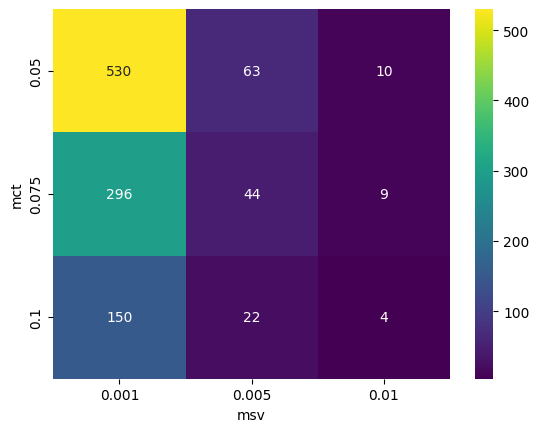

In [ ]:
sns.heatmap(heat_map, annot=True,fmt='d',cmap='viridis')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=min_supports_values)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=min_confidence_values)
plt.xlabel("msv")
plt.ylabel("mct")
plt.show()

# 1 (e)

In [ ]:
random.shuffle(data)

In [ ]:
split_point = len(data) // 2

dataset_1 = data[:split_point]
dataset_2 = data[split_point:]

In [ ]:
rules_dataset_1 = fit_association_rules(dataset_1,0.005,0.075)

In [ ]:
rules_dataset_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(tropical fruit),(yogurt),0.06925,0.08975,0.00700,0.101083,1.126273,0.000785,1.012607,0.120458
1,(yogurt),(tropical fruit),0.08975,0.06925,0.00700,0.077994,1.126273,0.000785,1.009484,0.123171
2,(tropical fruit),(whole milk),0.06925,0.16125,0.00950,0.137184,0.850754,-0.001667,0.972108,-0.158589
3,(tropical fruit),(rolls/buns),0.06925,0.11450,0.00600,0.086643,0.756704,-0.001929,0.969500,-0.256750
4,(tropical fruit),(other vegetables),0.06925,0.12000,0.00625,0.090253,0.752106,-0.002060,0.967302,-0.261515
5,(tropical fruit),(soda),0.06925,0.09625,0.00550,0.079422,0.825168,-0.001165,0.981721,-0.185428
6,(citrus fruit),(whole milk),0.05550,0.16125,0.00800,0.144144,0.893917,-0.000949,0.980013,-0.111621
7,(citrus fruit),(yogurt),0.05550,0.08975,0.00500,0.090090,1.003789,0.000019,1.000374,0.003997
8,(root vegetables),(whole milk),0.06875,0.16125,0.00675,0.098182,0.608879,-0.004336,0.930066,-0.408208
9,(root vegetables),(soda),0.06875,0.09625,0.00600,0.087273,0.906730,-0.000617,0.990164,-0.099471


In [ ]:
rules_dataset_2 = fit_association_rules(dataset_2,0.005,0.075)

In [ ]:
rules_dataset_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.10175,0.15750,0.01275,0.125307,0.795601,-0.003276,0.963195,-0.222403
1,(whole milk),(rolls/buns),0.15750,0.10175,0.01275,0.080952,0.795601,-0.003276,0.977370,-0.233681
2,(rolls/buns),(other vegetables),0.10175,0.12675,0.01100,0.108108,0.852924,-0.001897,0.979098,-0.161053
3,(other vegetables),(rolls/buns),0.12675,0.10175,0.01100,0.086785,0.852924,-0.001897,0.983613,-0.164903
4,(pip fruit),(rolls/buns),0.04750,0.10175,0.00575,0.121053,1.189706,0.000917,1.021961,0.167408
5,(pip fruit),(other vegetables),0.04750,0.12675,0.00600,0.126316,0.996574,-0.000021,0.999503,-0.003596
6,(pip fruit),(whole milk),0.04750,0.15750,0.00525,0.110526,0.701754,-0.002231,0.947189,-0.308530
7,(whole milk),(other vegetables),0.15750,0.12675,0.01600,0.101587,0.801478,-0.003963,0.971992,-0.227203
8,(other vegetables),(whole milk),0.12675,0.15750,0.01600,0.126233,0.801478,-0.003963,0.964216,-0.220970
9,(yogurt),(other vegetables),0.09100,0.12675,0.01025,0.112637,0.888658,-0.001284,0.984096,-0.121139


In [ ]:
pd.merge(rules_dataset_1, rules_dataset_2, on=['antecedents', 'consequents'])

,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,zhangs_metric_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y,zhangs_metric_y
0,(tropical fruit),(yogurt),0.06925,0.08975,0.00700,0.101083,1.126273,0.000785,1.012607,0.120458,0.06550,0.09100,0.00500,0.076336,0.838856,-0.000960,0.984124,-0.170513
1,(tropical fruit),(whole milk),0.06925,0.16125,0.00950,0.137184,0.850754,-0.001667,0.972108,-0.158589,0.06550,0.15750,0.00700,0.106870,0.678541,-0.003316,0.943312,-0.336410
2,(tropical fruit),(rolls/buns),0.06925,0.11450,0.00600,0.086643,0.756704,-0.001929,0.969500,-0.256750,0.06550,0.10175,0.00500,0.076336,0.750230,-0.001665,0.972486,-0.262678
3,(tropical fruit),(soda),0.06925,0.09625,0.00550,0.079422,0.825168,-0.001165,0.981721,-0.185428,0.06550,0.09275,0.00525,0.080153,0.864180,-0.000825,0.986305,-0.143969
4,(citrus fruit),(whole milk),0.05550,0.16125,0.00800,0.144144,0.893917,-0.000949,0.980013,-0.111621,0.05200,0.15750,0.00700,0.134615,0.854701,-0.001190,0.973556,-0.152057
5,(root vegetables),(whole milk),0.06875,0.16125,0.00675,0.098182,0.608879,-0.004336,0.930066,-0.408208,0.06925,0.15750,0.00675,0.097473,0.618876,-0.004157,0.933490,-0.398190
6,(root vegetables),(other vegetables),0.06875,0.12000,0.00550,0.080000,0.666667,-0.002750,0.956522,-0.349345,0.06925,0.12675,0.00575,0.083032,0.655089,-0.003027,0.952324,-0.361302
7,(yogurt),(whole milk),0.08975,0.16125,0.01425,0.158774,0.984647,-0.000222,0.997057,-0.016841,0.09100,0.15750,0.01000,0.109890,0.697715,-0.004332,0.946512,-0.322779
8,(yogurt),(rolls/buns),0.08975,0.11450,0.00675,0.075209,0.656846,-0.003526,0.957514,-0.364650,0.09100,0.10175,0.00900,0.098901,0.972001,-0.000259,0.996838,-0.030716
9,(yogurt),(other vegetables),0.08975,0.12000,0.00725,0.080780,0.673166,-0.003520,0.957333,-0.347850,0.09100,0.12675,0.01025,0.112637,0.888658,-0.001284,0.984096,-0.121139


# 2 Create and compile model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])



In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 8)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 129032)            0         
                                                                 
 dense (Dense)               (None, 16)                2064528   
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 2064820 (7.88 MB)
Trainable params: 2064820 (7.88 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

# Read Image Data

In [ ]:
path = "/content/drive/MyDrive/data_mining/processed"

In [ ]:
batch_size = 8
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=100
)

# Define the validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=100
)

Found 713 files belonging to 4 classes.
Using 571 files for training.
Found 713 files belonging to 4 classes.
Using 142 files for validation.


# Train Model

In [ ]:
history = model.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
72/72 [==============================] - 19s 245ms/step - loss: 169.0852 - accuracy: 0.2907 - val_loss: 1.4193 - val_accuracy: 0.2324
Epoch 2/20
72/72 [==============================] - 20s 282ms/step - loss: 1.3835 - accuracy: 0.3030 - val_loss: 1.3867 - val_accuracy: 0.2324
Epoch 3/20
72/72 [==============================] - 16s 220ms/step - loss: 1.3812 - accuracy: 0.3082 - val_loss: 1.3858 - val_accuracy: 0.2324
Epoch 4/20
72/72 [==============================] - 17s 237ms/step - loss: 1.3788 - accuracy: 0.3082 - val_loss: 1.3878 - val_accuracy: 0.2324
Epoch 5/20
72/72 [==============================] - 17s 233ms/step - loss: 1.3772 - accuracy: 0.3065 - val_loss: 1.3942 - val_accuracy: 0.2324
Epoch 6/20
72/72 [==============================] - 16s 221ms/step - loss: 1.3762 - accuracy: 0.3082 - val_loss: 1.3919 - val_accuracy: 0.2324
Epoch 7/20
72/72 [==============================] - 17s 231ms/step - loss: 1.3751 - accuracy: 0.3082 - val_loss: 1.3935 - val_accuracy: 0.23

# 2 (a)

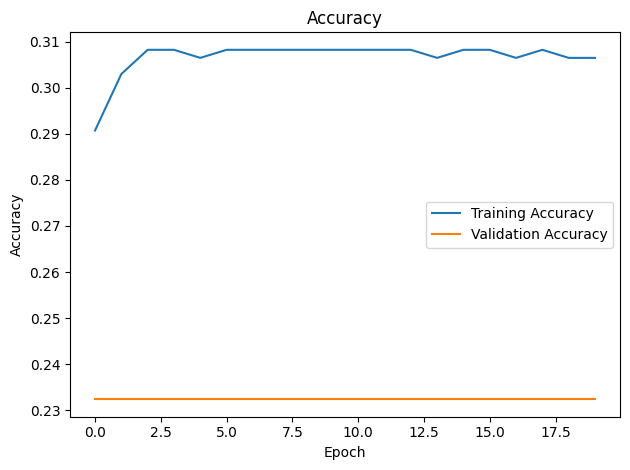

In [ ]:

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']


plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# 2 (b). Experiment with filters changes to 4 and 16

In [ ]:
new_model1 = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

new_model2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])




# Compile new models

In [ ]:
new_model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])
new_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [ ]:
new_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 4)       112       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 4)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64516)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                1032272   
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1032452 (3.94 MB)
Trainable params: 1032452 (3.94 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
new_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 258064)            0         
                                                                 
 dense_4 (Dense)             (None, 16)                4129040   
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 4129556 (15.75 MB)
Trainable params: 4129556 (15.75 MB)
Non-trainable params: 0 (0.00 Byte)
______________

# Train new model 1

In [ ]:
new_history1 = new_model1.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
72/72 [==============================] - 16s 208ms/step - loss: 2.0842 - accuracy: 0.2627 - val_loss: 1.5421 - val_accuracy: 0.2606
Epoch 2/20
72/72 [==============================] - 15s 207ms/step - loss: 1.1186 - accuracy: 0.4904 - val_loss: 1.5606 - val_accuracy: 0.2746
Epoch 3/20
72/72 [==============================] - 16s 216ms/step - loss: 0.9246 - accuracy: 0.6130 - val_loss: 1.8147 - val_accuracy: 0.3169
Epoch 4/20
72/72 [==============================] - 15s 204ms/step - loss: 0.8059 - accuracy: 0.6848 - val_loss: 2.1588 - val_accuracy: 0.3028
Epoch 5/20
72/72 [==============================] - 16s 218ms/step - loss: 0.7892 - accuracy: 0.7356 - val_loss: 1.9642 - val_accuracy: 0.3028
Epoch 6/20
72/72 [==============================] - 16s 218ms/step - loss: 0.5530 - accuracy: 0.7968 - val_loss: 2.2395 - val_accuracy: 0.2676
Epoch 7/20
72/72 [==============================] - 15s 207ms/step - loss: 0.5050 - accuracy: 0.8319 - val_loss: 2.2508 - val_accuracy: 0.2746

# Train New Model 2

In [ ]:
new_history2 = new_model2.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
72/72 [==============================] - 23s 291ms/step - loss: 240.3787 - accuracy: 0.3012 - val_loss: 1.4422 - val_accuracy: 0.2324
Epoch 2/20
72/72 [==============================] - 27s 371ms/step - loss: 1.3867 - accuracy: 0.3117 - val_loss: 1.4179 - val_accuracy: 0.2324
Epoch 3/20
72/72 [==============================] - 19s 265ms/step - loss: 1.3778 - accuracy: 0.3100 - val_loss: 1.4229 - val_accuracy: 0.2324
Epoch 4/20
72/72 [==============================] - 20s 279ms/step - loss: 1.3760 - accuracy: 0.3100 - val_loss: 1.4244 - val_accuracy: 0.2324
Epoch 5/20
72/72 [==============================] - 21s 288ms/step - loss: 1.3746 - accuracy: 0.3100 - val_loss: 1.4252 - val_accuracy: 0.2324
Epoch 6/20
72/72 [==============================] - 28s 392ms/step - loss: 1.3734 - accuracy: 0.3100 - val_loss: 1.4262 - val_accuracy: 0.2324
Epoch 7/20
72/72 [==============================] - 29s 399ms/step - loss: 1.3724 - accuracy: 0.3100 - val_loss: 1.4272 - val_accuracy: 0.23

# 2 (c)

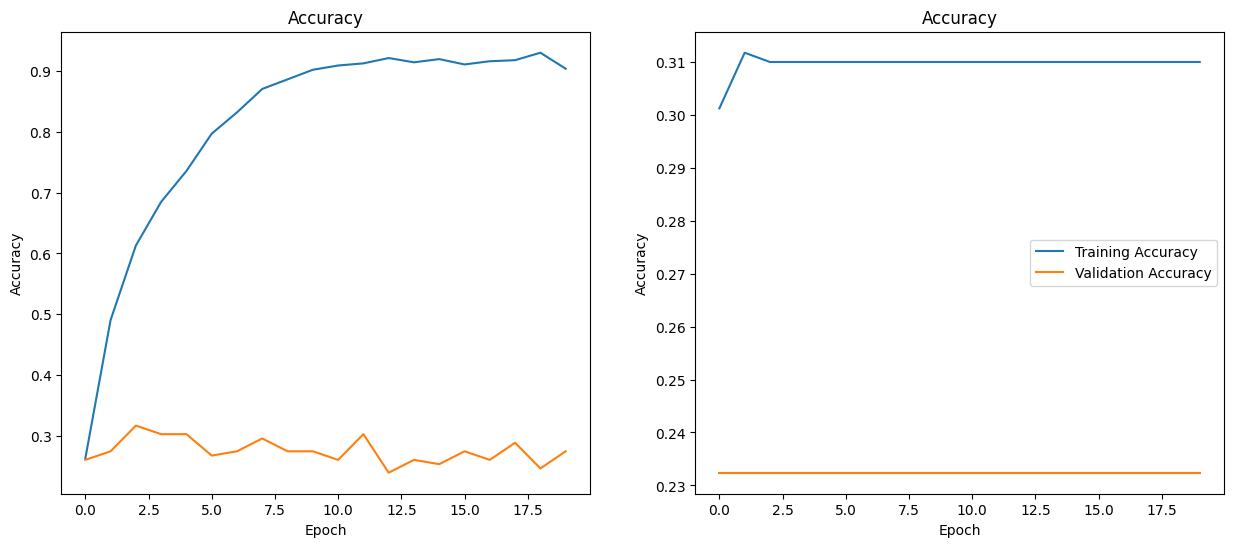

In [ ]:

training_accuracy1 = new_history1.history['accuracy']
validation_accuracy1 = new_history1.history['val_accuracy']

training_accuracy2 = new_history2.history['accuracy']
validation_accuracy2 = new_history2.history['val_accuracy']

fig,axes = plt.subplots(1,2,figsize=(15,6))
axes[0].plot(training_accuracy1, label='Training Accuracy')
axes[0].plot(validation_accuracy1, label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

axes[1].plot(training_accuracy2, label='Training Accuracy')
axes[1].plot(validation_accuracy2, label='Validation Accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
plt.legend()

plt.show()


# 2 (d)

1. The initial model appears to suffer from underfitting, as persistently low  accuracies across both training and validation sets.

2. In the  experiment model 1 with four filters is overfitting. While the training accuracy increased to 94%, the validation accuracy remained below 25%.

3. In the  experiment model 1 with sixteen filters, is underfitting. Both training and validation accuracies are strikingly low.